# Практическая работа 1. Работа с Pymol

In [1]:
import __main__
__main__.pymol_argv = [ 'pymol', '-x' ]

import pymol
pymol.finish_launching() # для локального запуска
from pymol import cmd,stored


from IPython.display import Image
import time



 PyMOL(TM) Molecular Graphics System, Version 2.5.0.
 Copyright (c) Schrodinger, LLC.
 All Rights Reserved.
 
    Created by Warren L. DeLano, Ph.D. 
 
    PyMOL is user-supported open-source software.  Although some versions
    are freely available, PyMOL is not in the public domain.
 
    If PyMOL is helpful in your work or study, then please volunteer 
    support for our ongoing efforts to create open and affordable scientific
    software by purchasing a PyMOL Maintenance and/or Support subscription.

    More information can be found at "http://www.pymol.org".
 
    Enter "help" for a list of commands.
    Enter "help <command-name>" for information on a specific command.

 Hit ESC anytime to toggle between text and graphics.

 Detected OpenGL version 4.6. Shaders available.
 Detected GLSL version 4.60.
 OpenGL graphics engine:
  GL_VENDOR:   NVIDIA Corporation
  GL_RENDERER: NVIDIA GeForce RTX 3070/PCIe/SSE2
  GL_VERSION:  4.6.0 NVIDIA 570.172.08
 Detected 16 CPU cores.  Enable

In [2]:


cmd.reinitialize()

cmd.do('bg white')

In [15]:
cmd.fetch('1lmp')

'1lmp'

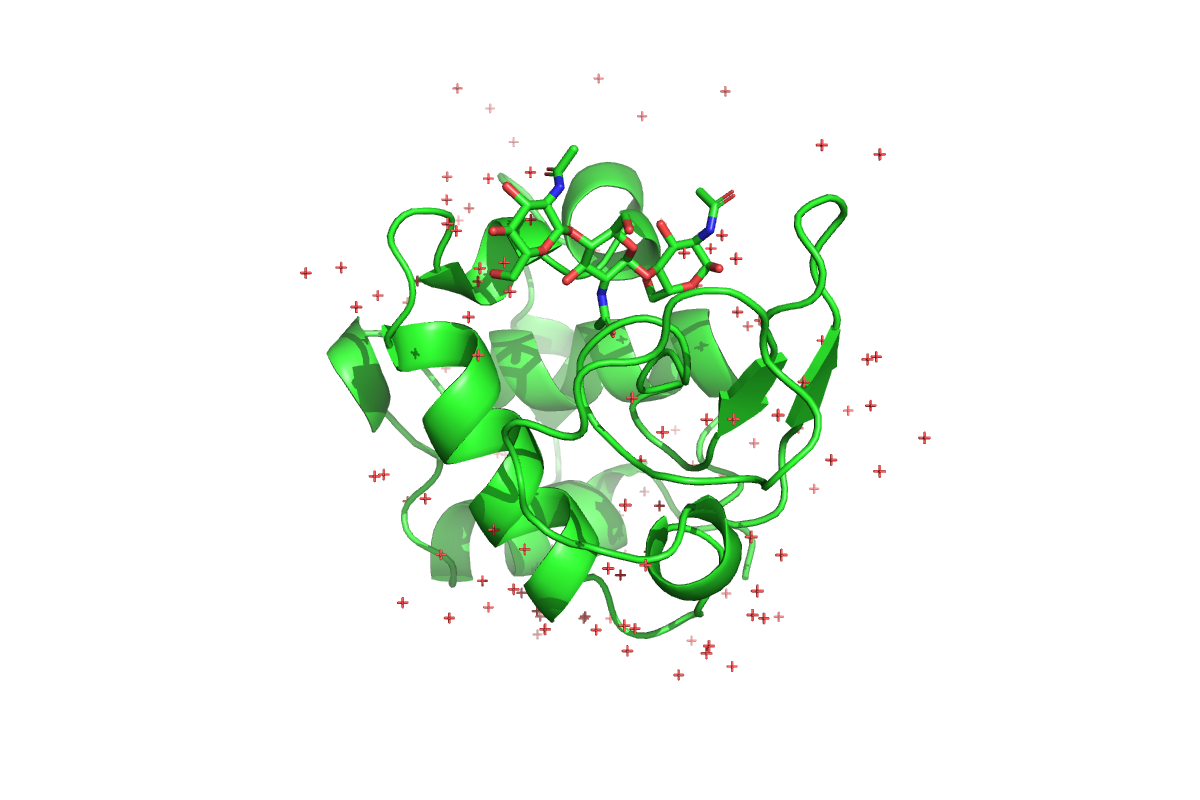

In [58]:
cmd.png('prak1_1.png') # сохранение сессии pymol в виде картинки
cmd.ray(1200,800)
Image(filename='prak1_1.png') # вывод картинки в ноутбук

## 1. Sculpting
- позволяет деформировать части белка с учётом стерических препятствий и физических ограничений

In [59]:
cmd.wizard("sculpting")

До манипуляций:

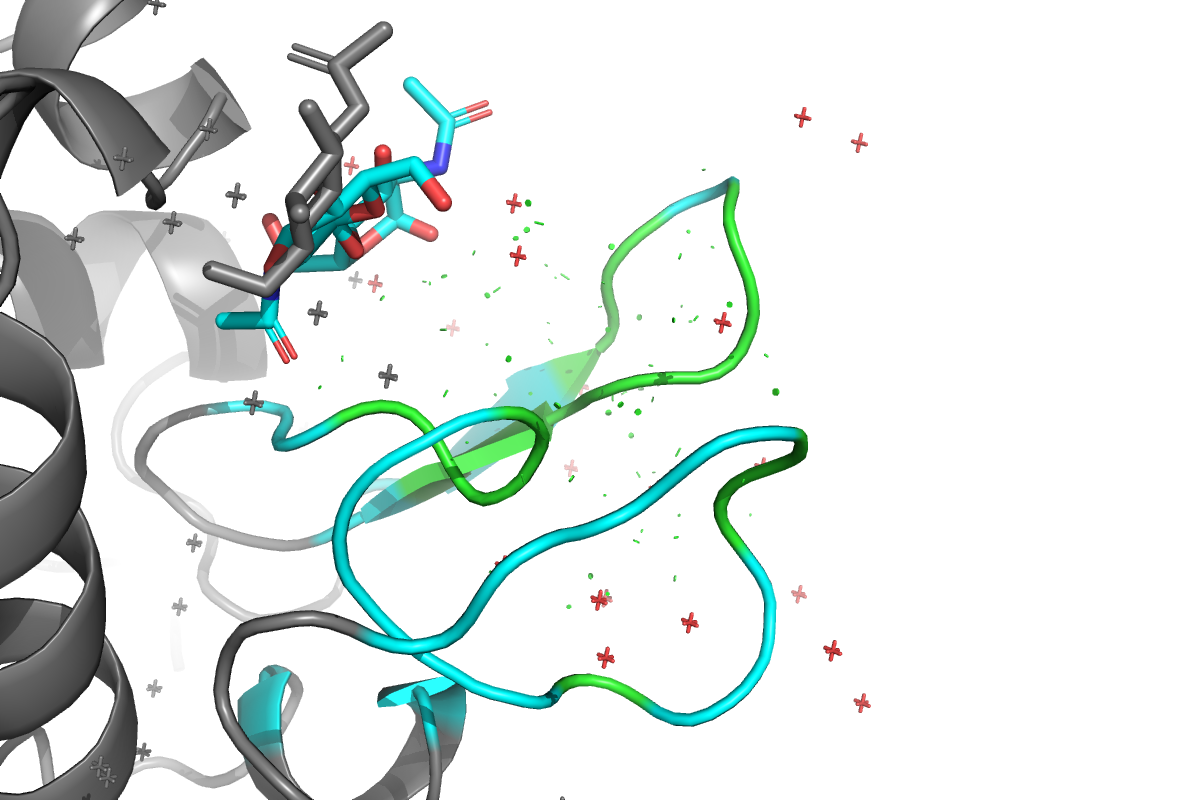

In [64]:
cmd.png('prak1_2.png')
cmd.ray(1200,800)
Image(filename='prak1_2.png')

После деформации мышкой:

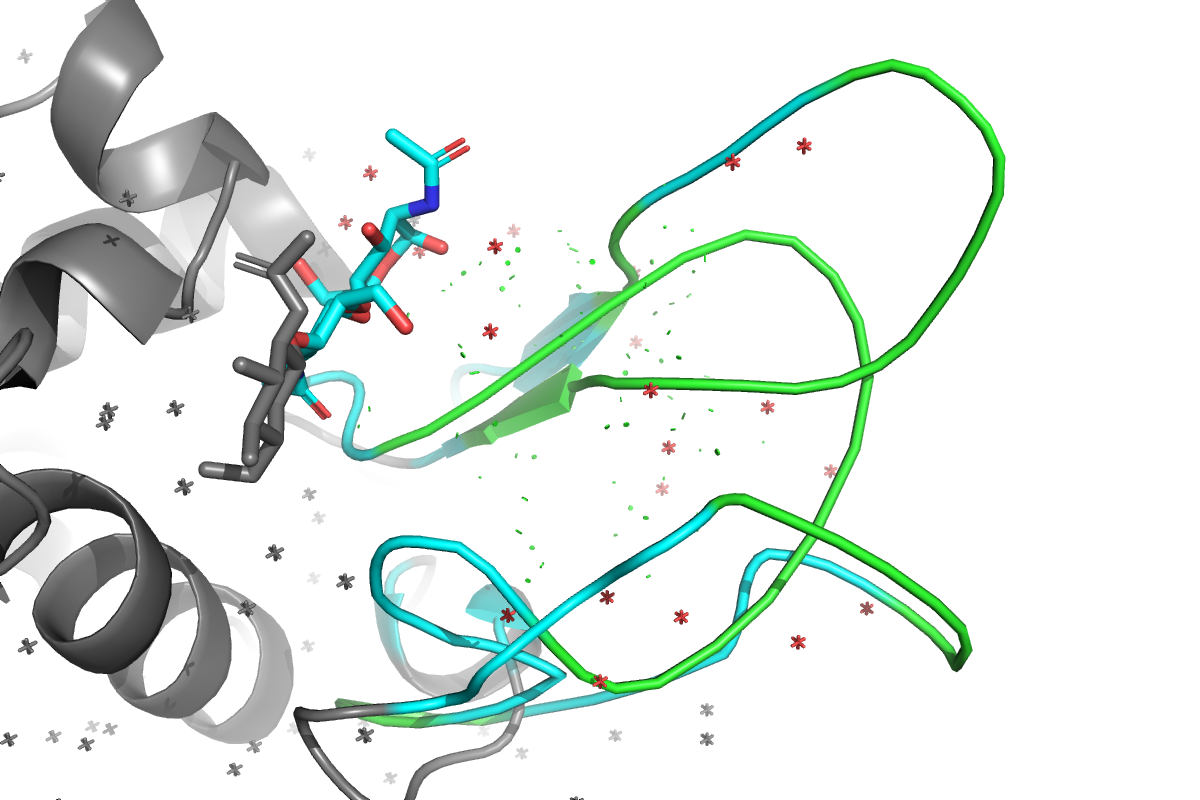

In [66]:
cmd.png('prak1_3.png')
cmd.ray(1200,800)
Image(filename='prak1_3.png')

Как видно структура довольно сильно поменялась пространственно

## 2. Поиск водородных связей при взаимодействии с лигандом

In [36]:
# Идентифицируем лиганд
cmd.select("ligand", "organic")


43

In [37]:
# Скрываем все
cmd.hide("everything", "all")

# Показываем только лиганд
cmd.show("sticks", "ligand")

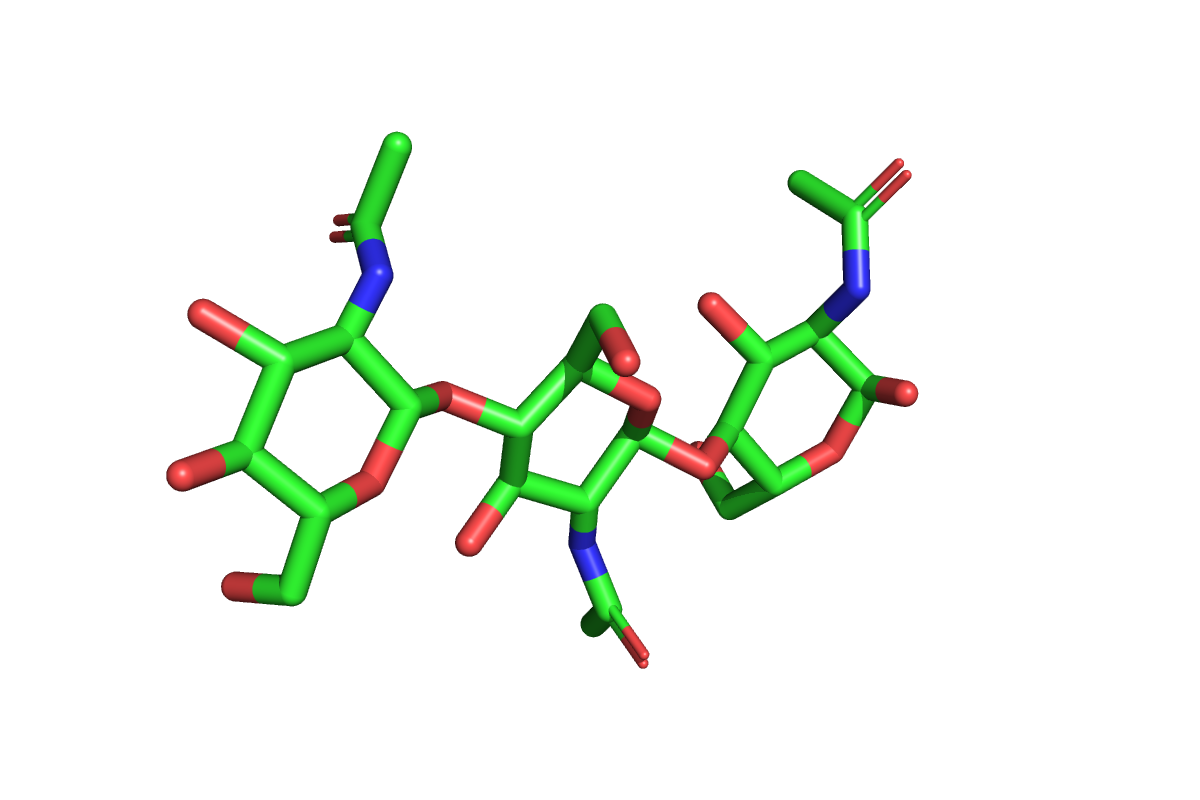

In [76]:
cmd.png('prak1_4.png') # сохранение сессии pymol в виде картинки
cmd.ray(1200,800)
Image(filename='prak1_4.png') # вывод картинки в ноутбук

Видим наш лиганд

In [38]:
cmd.select("water", "resn HOH")

117

In [39]:
cmd.select("protein", "polymer")

999

In [40]:
cmd.select("hb_donors_acceptors", "(polymer within 3.5 of ligand) and (donor or acceptor)")
cmd.select("ligand_donors_acceptors", "(ligand) and (donor or acceptor)")

# Создаем расстояния
cmd.distance("h_bonds", "ligand_donors_acceptors", "hb_donors_acceptors", 3.2, mode=2)

# Визуализация
cmd.hide("everything", "all")
#cmd.hide("everything", "water")
cmd.show("sticks", "ligand")
cmd.show("sticks", "hb_donors_acceptors")
cmd.show("dashes", "h_bonds")
cmd.color("red", "ligand")
cmd.color("yellow", "hb_donors_acceptors")
cmd.color("green", "h_bonds")
cmd.set("dash_radius", 0.08)
cmd.set("dash_gap", 0.4)
# Отображаем в виде шариков и палочек
cmd.show("cartoon", "protein")    # палочки

In [41]:
cmd.hide("everything", "all")
cmd.show("cartoon", "protein")
cmd.color("grey", "protein")
cmd.set("cartoon_transparency", 0.7, "protein")
cmd.select("active_site", "polymer within 5 of ligand")
cmd.show("sticks", "active_site")
cmd.show("sticks", "ligand")
cmd.show("spheres", "ligand")
cmd.color("red", "ligand")
cmd.set("stick_radius", 0.2, "ligand")
cmd.set("sphere_scale", 0.3, "ligand")
cmd.show("dashes", "h_bonds")
cmd.color("green", "h_bonds")
cmd.set("dash_radius", 0.08)
cmd.set("dash_gap", 0.4)
cmd.set("stick_radius", 0.15, "active_site")
cmd.set("stick_ball", 1, "active_site")
cmd.set("stick_ball_ratio", 1.5, "active_site")
cmd.set("cartoon_oval_length", 1.2)
cmd.set("cartoon_oval_width", 0.4)

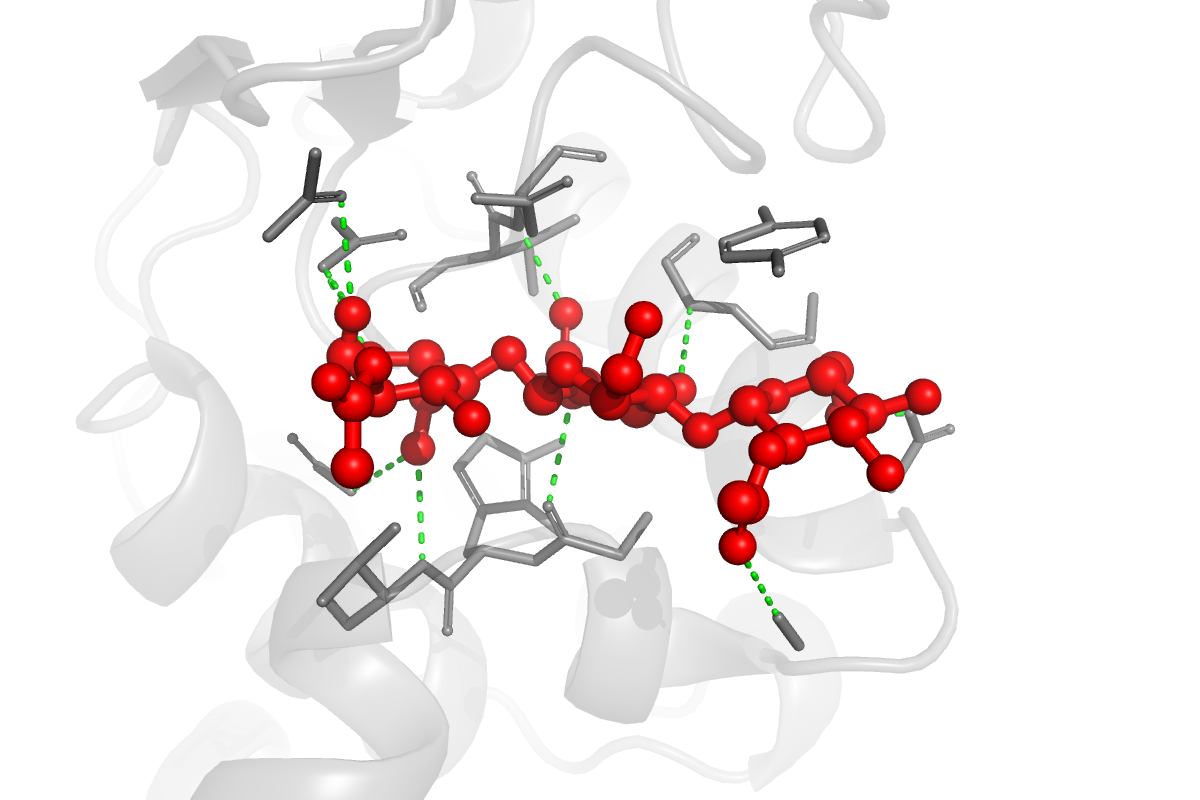

In [128]:
cmd.png('prak1_4.png')
cmd.ray(1200,800)
Image(filename='prak1_4.png')

Получили необходимый вид. Но на самом деле нужно ещё отобрать водородные связи по углам, они должны быть около 150 градусов

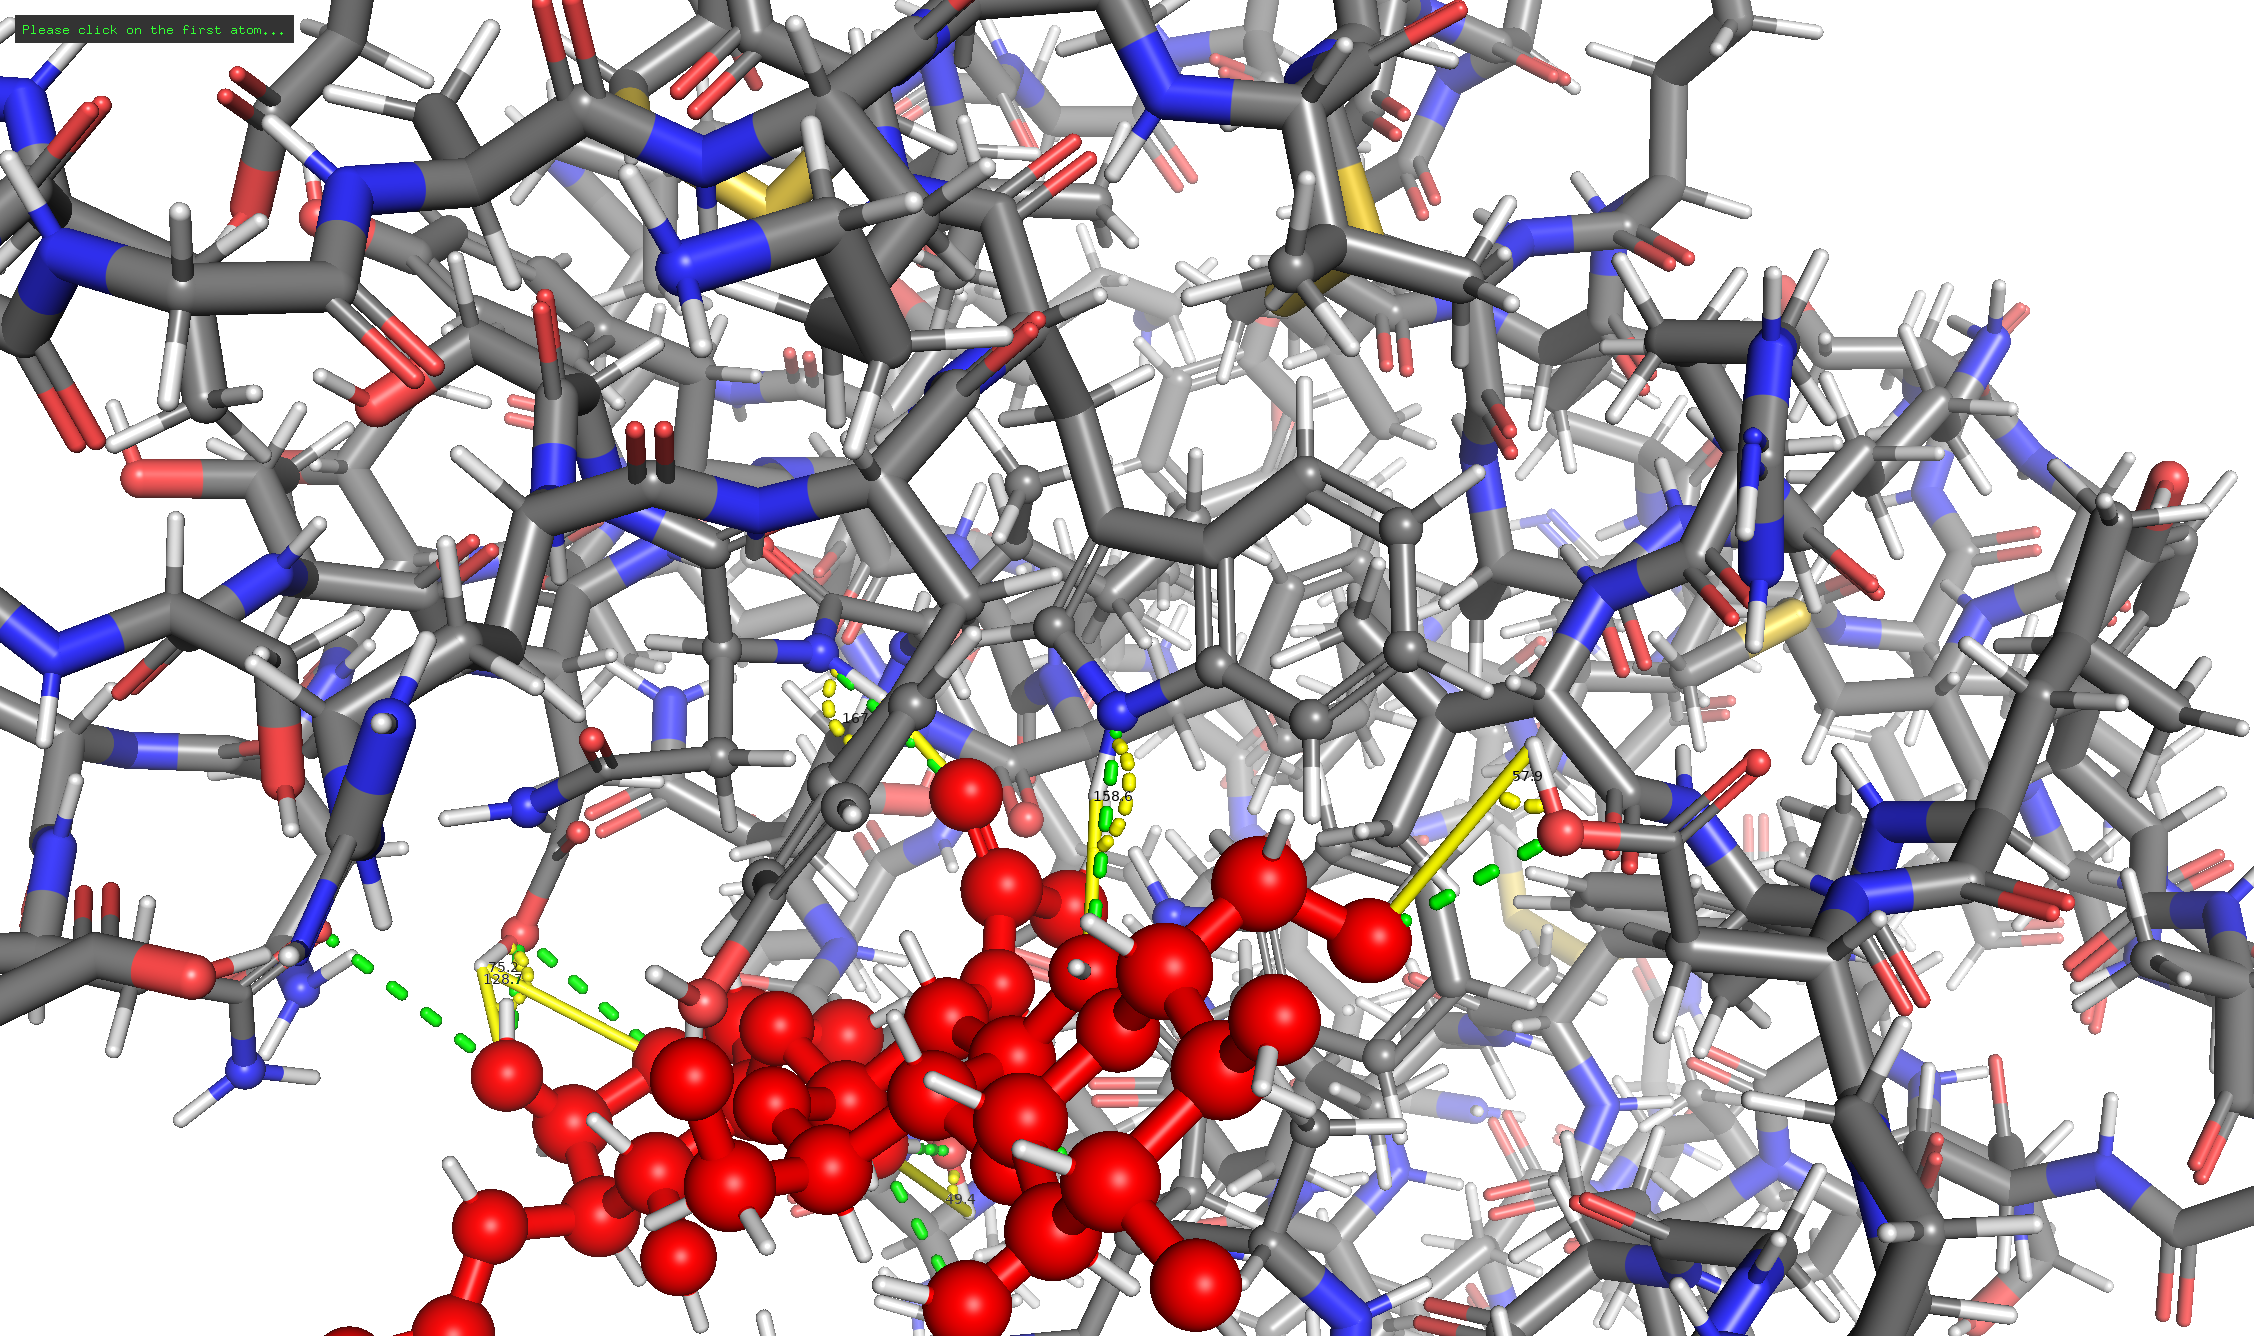

In [10]:
cmd.png('prak1_5.png') # сохранение сессии pymol в виде картинки
cmd.ray(1200,800)
Image(filename='prak1_5.png') # вывод картинки в ноутбук

## Внесение мутаций

In [141]:
# Активируем mutagenesis wizard
cmd.wizard("mutagenesis")

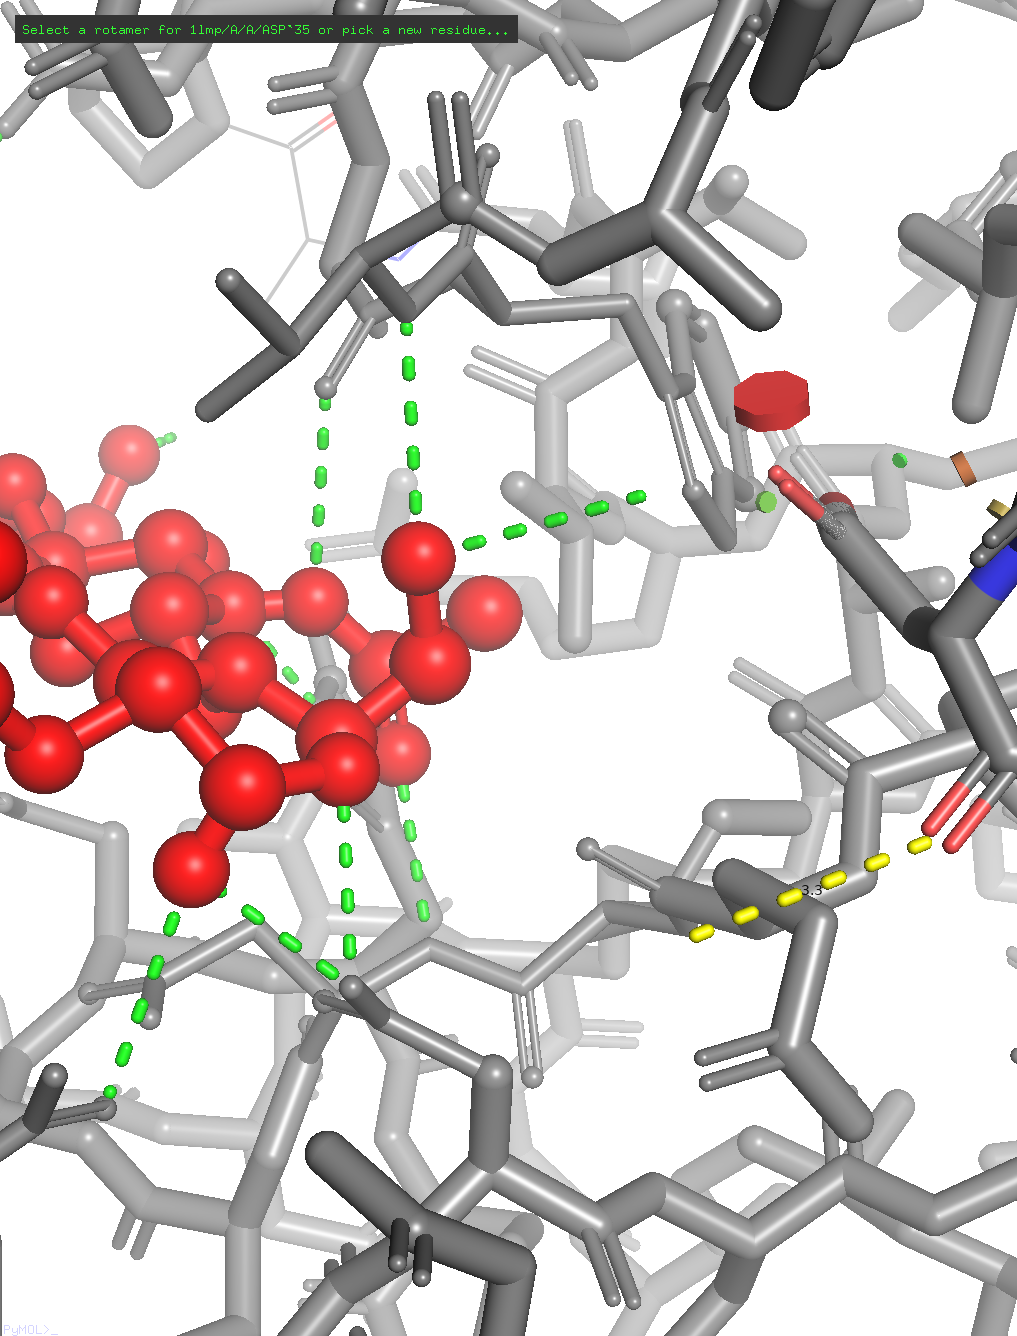

In [42]:
cmd.png('prak1_5.png') # сохранение сессии pymol в виде картинки
cmd.ray(1200,800)
Image(filename='prak1_5.png') # вывод картинки в ноутбук

Данная аминокислота в центре образовывала больше всего связей, поэтому в первую очередь мутируем именно её

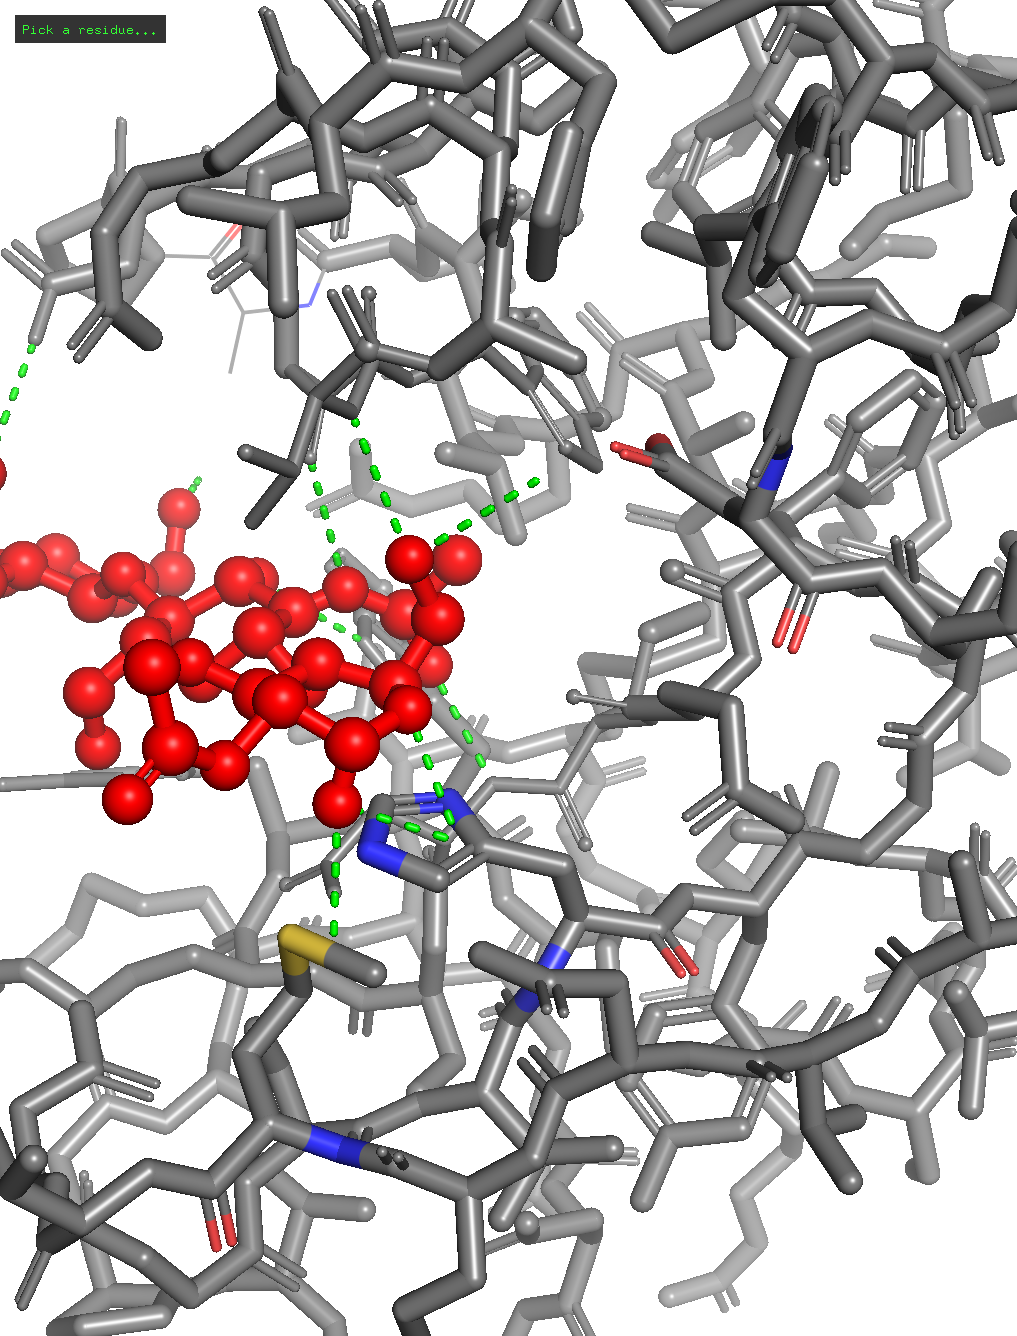

In [43]:
cmd.png('prak1_6.png') # сохранение сессии pymol в виде картинки
cmd.ray(1200,800)
Image(filename='prak1_6.png') # вывод картинки в ноутбук

In [45]:
# Снова создаем водородные связи для мутанта
cmd.select("hb_donors_acceptors_mut", "(polymer within 3.5 of ligand) and (donor or acceptor)")
cmd.select("ligand_donors_acceptors", "(ligand) and (donor or acceptor)")

# Обновляем расстояния H-связей
cmd.delete("h_bonds")  # удаляем старые
cmd.distance("h_bonds_mutant", "ligand_donors_acceptors", "hb_donors_acceptors_mut", 3.2, mode=2)


2.669318437576294

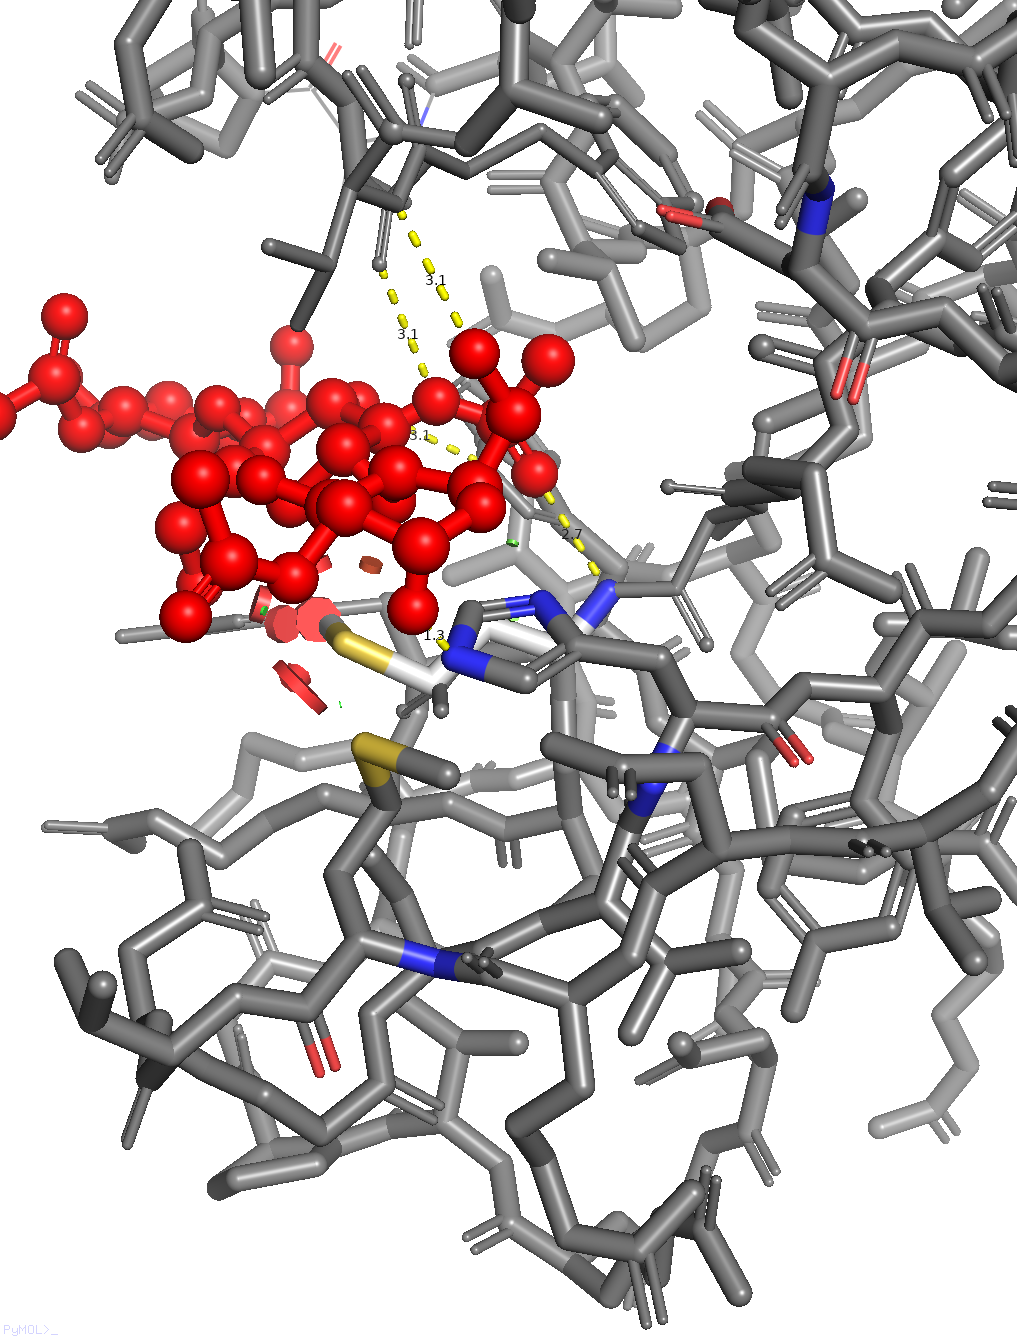

In [46]:
cmd.png('prak1_7.png') # сохранение сессии pymol в виде картинки
cmd.ray(1200,800)
Image(filename='prak1_7.png') # вывод картинки в ноутбук

Видим, что связей стало гораздо меньше

In [48]:
# Снова создаем водородные связи для мутанта
cmd.select("hb_donors_acceptors_mut", "(polymer within 3.5 of ligand) and (donor or acceptor)")
cmd.select("ligand_donors_acceptors", "(ligand) and (donor or acceptor)")

# Обновляем расстояния H-связей
cmd.delete("h_bonds_mutant")  # удаляем старые
cmd.distance("h_bonds_mutant", "ligand_donors_acceptors", "hb_donors_acceptors_mut", 3.2, mode=2)


2.2063608169555664

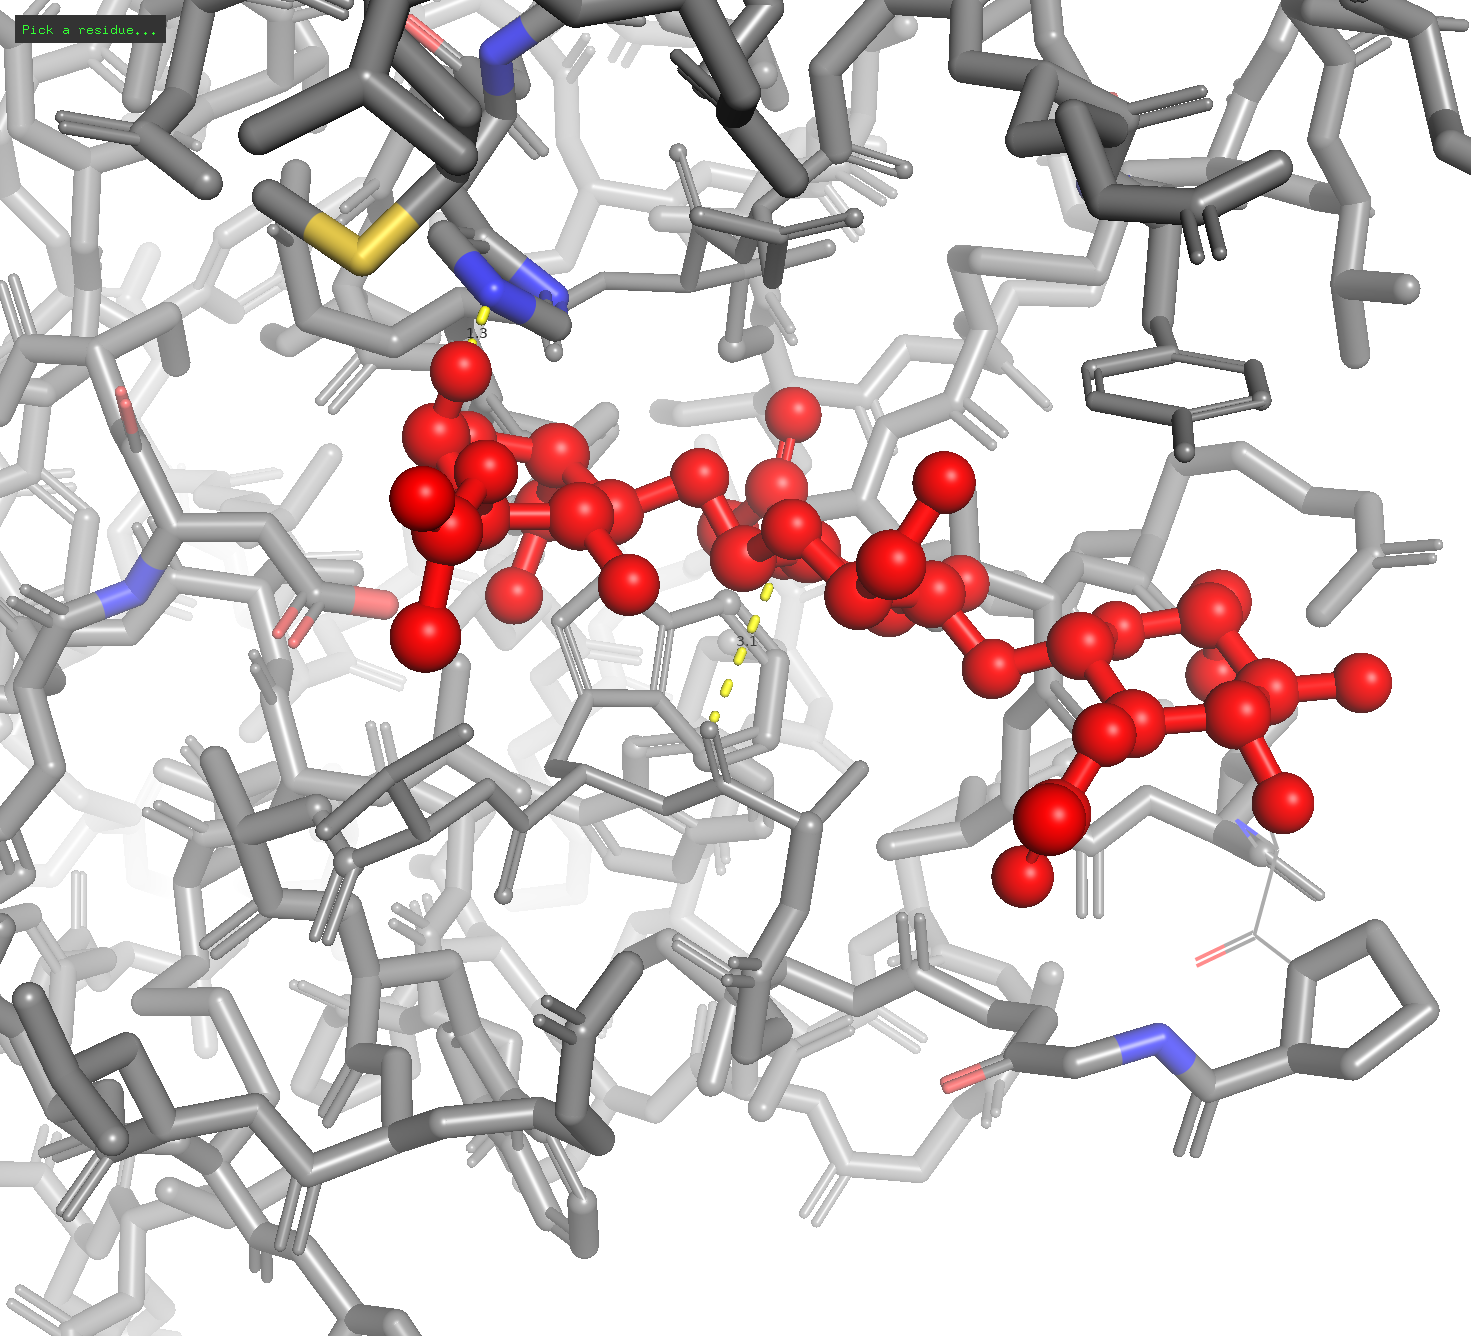

In [49]:
cmd.png('prak1_8.png') # сохранение сессии pymol в виде картинки
cmd.ray(1200,800)
Image(filename='prak1_8.png') # вывод картинки в ноутбук

Осталось всего пару связей

Попыталась сделать мультик, но выглядит ужасно

## Флуорусцентная метка

In [7]:
cmd.delete('all')
cmd.fetch('1lmp')

'1lmp'

In [8]:
import requests
import tempfile
import os
def fetch_compound(cid, object_name):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/SDF"
    response = requests.get(url)
    
    with tempfile.NamedTemporaryFile(mode='w', suffix='.sdf', delete=False) as f:
        f.write(response.text)
        temp_file = f.name
    
    cmd.load(temp_file, object_name)
    os.unlink(temp_file)
    return f"Объект {object_name} загружен"

fetch_compound(2762604, 'TAMRA')
cmd.show('sticks', 'TAMRA')

cmd.do('''
select sero37, 1lmp and resi 37 
select ser37, 1lmp and resi 37 and name OG
as sticks, sero37
''')

In [9]:
cmd.orient("all")

In [10]:
# соединили в окне
cmd.do('''
fuse
torsion -15
''')

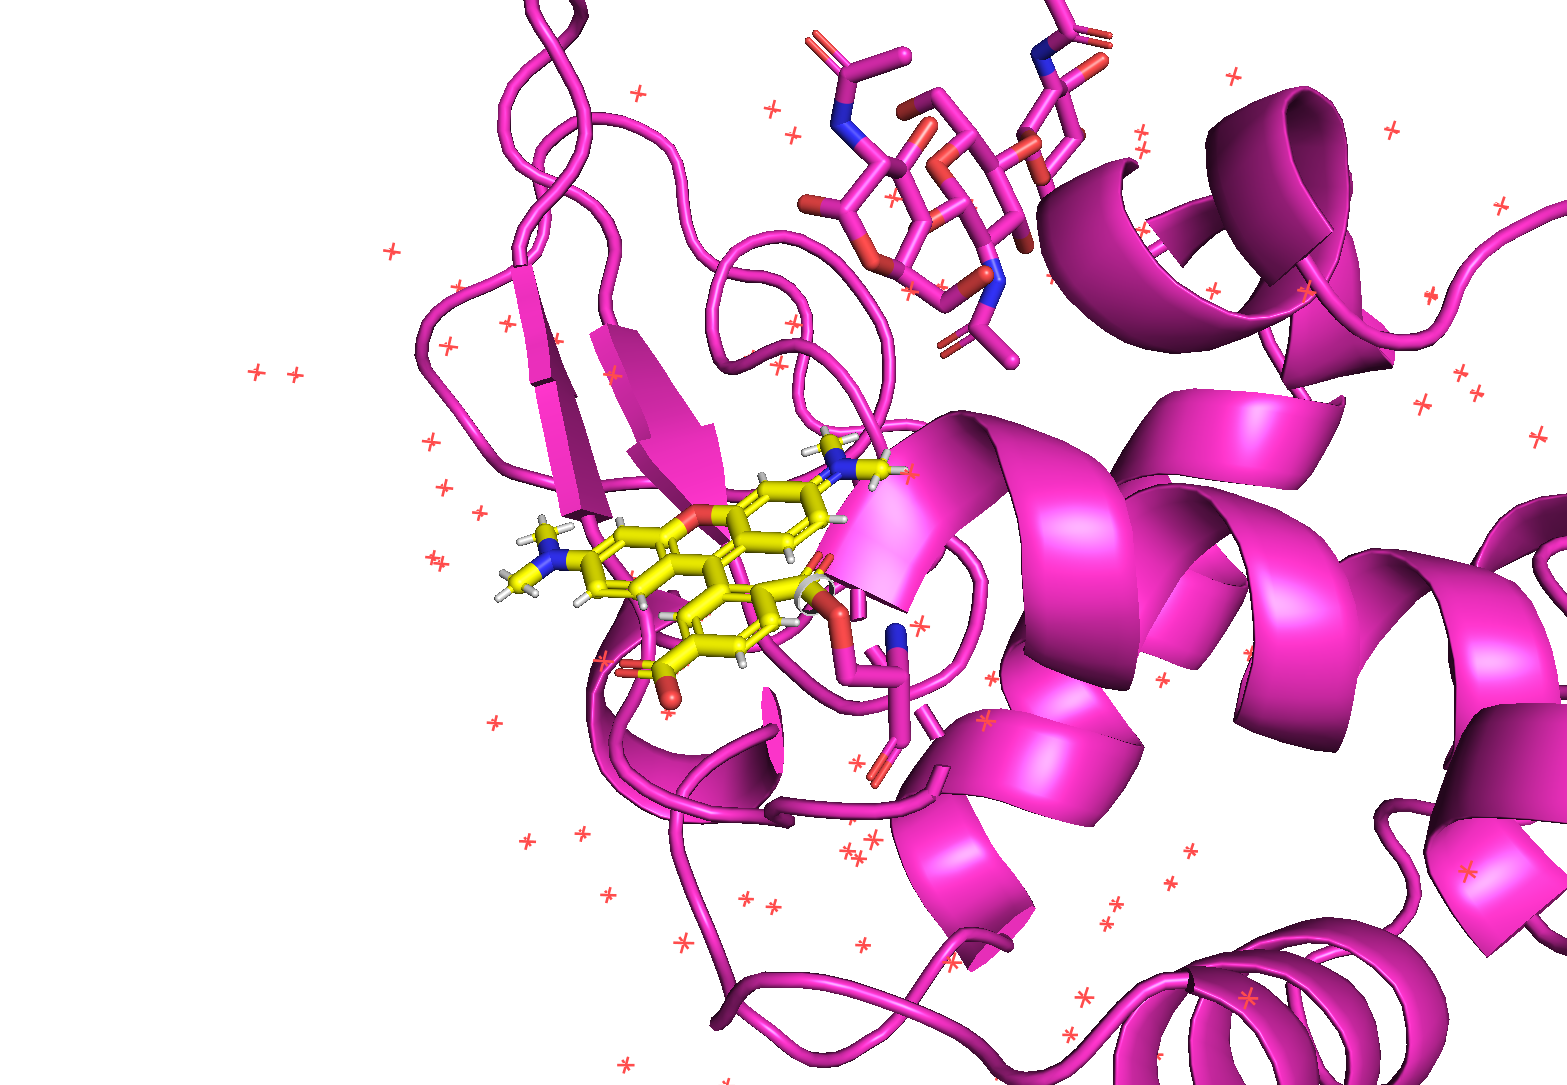

In [11]:
cmd.png('prak1_10.png') # сохранение сессии pymol в виде картинки
cmd.ray(1200,800)
Image(filename='prak1_10.png') # вывод картинки в ноутбукя

Успешно присоединили метку!!

## Полиаланиновая цепь

In [11]:
from pymol import cmd, editor

cmd.delete('all')
cmd.fragment('ala')

# Присоединение аминокислот
for x in range(2, 101):
    try:
        cmd.edit(f"/ala///{x}/C")
        editor.attach_amino_acid("pk1", "ala")
    except:
        try:
            cmd.edit(f"ala and resi {x} and name C")
            editor.attach_amino_acid("pk1", "ala")
        except:
            continue

# Настройка углов
for x in range(3, 101):
    try:
        cmd.edit(f"/ala///{x}/N", f"/ala///{x}/CA")
        cmd.torsion(70)
        cmd.edit(f"/ala///{x-1}/CA", f"/ala///{x-1}/C")
        cmd.torsion(180)
    except:
        continue

# Визуализация
cmd.zoom('ala')
cmd.show('sticks', 'ala')


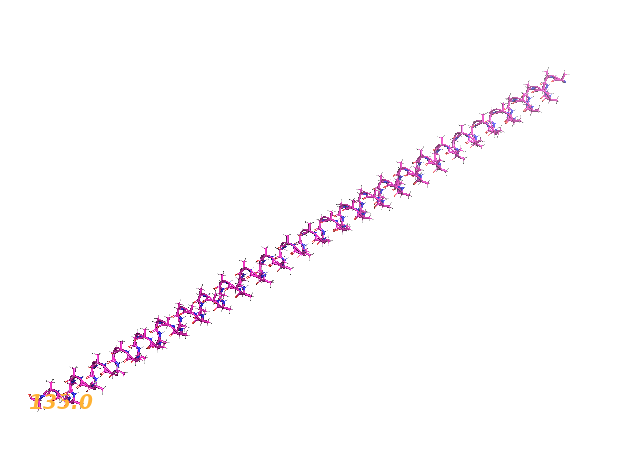

In [12]:
cmd.png('prak1_10.png') # сохранение сессии pymol в виде картинки
cmd.ray(1200,800)
Image(filename='prak1_10.png') # вывод картинки в ноутбук